In [39]:
import pandas as pd

In [40]:
import numpy as np

In [41]:
from numpy import *

In [47]:
import os
import pandas as pd
import json
import copy

In [54]:
filepath = "/home/ssirobh/data_mining"

In [72]:
user_file = open(os.path.join(filepath, "new_review.json"), "rb")

In [73]:

data = user_file.read()


In [74]:
data[1:10000]

b'"review_id":"Q1sbwvVQXV2734tPgoKj4Q","user_id":"hG7b0MtEbXx5QzbzE6C_VA","business_id":"ujmEBvifdJM6h6RLv4wQIg","stars":1.0,"useful":6,"funny":1,"cool":0,"text":"Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.","date":"2013-05-07 04:34:36"}\n{"review_id":"GJXCdrto3ASJOqKeVWPi6Q","user_id":"yXQM5uF2jS6es16SJzNHfg","business_id":"NZnhc2sEQy3RmzKTZnqtwQ","stars":5.0,"useful":0,"funny":0,"cool":0,"text":"I *adore* Travis at the Hard Rock\'s new Kelly Cardenas Salon!  I\'m always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  \\n\\nTravis\'s greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit.  Next comes the most relaxing and incredible shampoo -- where you get a 

In [79]:
data_out_flat = []
data_out = []
blank_reviewer = {'reviewer_average_stars': 0,
 'reviewer_cool': 0,
 'reviewer_funny': 0,
 'reviewer_name': None,
 'reviewer_review_count': 0,
 'reviewer_type': 'user',
 'reviewer_useful': 0,
 'reviewer_blank': True}

In [80]:
blank_reviewer

{'reviewer_average_stars': 0,
 'reviewer_blank': True,
 'reviewer_cool': 0,
 'reviewer_funny': 0,
 'reviewer_name': None,
 'reviewer_review_count': 0,
 'reviewer_type': 'user',
 'reviewer_useful': 0}

In [83]:
for x in data.decode("utf8").split("\n"):
    if len(x) == 0:
        continue
    jsn = json.loads(x)
    data_out_flat.append(jsn)

In [84]:
data_out_flat[0]

{'business_id': 'ujmEBvifdJM6h6RLv4wQIg',
 'cool': 0,
 'date': '2013-05-07 04:34:36',
 'funny': 1,
 'review_id': 'Q1sbwvVQXV2734tPgoKj4Q',
 'stars': 1.0,
 'text': 'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.',
 'useful': 6,
 'user_id': 'hG7b0MtEbXx5QzbzE6C_VA'}

In [89]:
df = pd.DataFrame.from_dict(data_out_flat)

In [90]:
df

business_id  cool                 date  funny  \
0    ujmEBvifdJM6h6RLv4wQIg     0  2013-05-07 04:34:36      1   
1    NZnhc2sEQy3RmzKTZnqtwQ     0  2017-01-14 21:30:33      0   
2    WTqjgwHlXbSFevF32_DJVw     0  2016-11-09 20:09:03      0   
3    ikCg8xy5JIg_NGPx-MSIDA     0  2018-01-09 20:56:38      0   
4    b1b1eb3uo-w561D0ZfCEiQ     0  2018-01-30 23:07:38      0   
5    eU_713ec6fTGNO4BegRaww     0  2013-01-20 13:25:59      0   
6    3fw2X5bZYeW9xCz_zGhOHg     5  2016-05-07 01:21:02      4   
7    zvO-PJCpNk4fgAVUnExYAA     1  2010-10-05 19:12:35      1   
8    b2jN2mm9Wf3RcrZCgfo1cg     0  2015-01-18 14:04:18      0   
9    oxwGyA17NL6c5t1Etg5WgQ     1  2012-02-29 21:52:43      0   
10   8mIrX_LrOnAqWsB5JrOojQ     0  2011-11-30 02:11:15      0   
11   mRUVMJkUGxrByzMQ2MuOpA     0  2017-12-15 23:27:08      1   
12   FxLfqxdYPA6Z85PFKaqLrg     0  2016-05-07 01:36:53      0   
13   LUN6swQYa4xJKaM_UEUOEw     0  2018-04-27 20:25:26      0   
14   AakkkTuGZA2KBodKi2_u8A     0  2012-07-16 00:37:14      1   
15   YvrylyuWgbP90RgMqZQVnQ     0  2017-04-07 21:27:49      0   
16   NyLYY8q1-H3hfsTwuwLPCg     0  2015-01-03 22:47:34      0   
17   cHdJXLlKNWixBXpDwEGb_A     1  2015-04-01 16:30:00      7   
18   6lj2BJ4tJeu7db5asGHQ4w     0  2017-05-26 01:23:19      0   
19   y-Iw6dZflNix4BdwIyTNGA     0  2014-06-27 21:19:23      0   
20   qx6WhZ42eDKmBchZDax4dQ     0  2017-03-27 01:14:37      0   
21   Mem13A3C202RzT53npn4NA     9  2017-05-13 10:41:43      6   
22   I4Nr-MVc26qWr08-S3Q1ow     0  2016-01-17 05:26:22      0   
23   d_L-rfS1vT3JMzgCUGtiow     0  2016-07-25 03:57:19      0   
24   Sfc8Haz2Yri8Mo1L0E0TsA     0  2012-11-06 03:41:43      0   
25   FQ1wBQb3aNeRMThSQEV0Qg     0  2013-12-07 02:32:45      0   
26   hd5xm20tfSa70-6UqD9-bg     1  2014-08-10 22:07:35      1   
27   Gyrez6K8f1AyR7dzW9fvAw     1  2013-12-28 22:28:08      0   
28   9nTF596jDvBBia2EXXiOOg     0  2014-04-19 15:03:17      0   
29   SNL64axQhCO6Z7ohcWg3wA     0  2017-02-09 03:43:25      0   
..                      ...   ...                  ...    ...   
470  y19xFolCozaRA-gGmHwkQA     0  2017-01-02 03:17:33      0   
471  1hqOjPxgH8IXE4bNq6DFiw     0  2016-08-25 13:12:22      0   
472  jqAdZf9PJo8lsRskc6T1Sw     0  2012-03-01 01:21:28      0   
473  IsNyYU75dVu0Nnoo8bO4gA     0  2018-03-04 00:01:43      0   
474  fYTfTGqseS7rJk9AMt2zvw     0  2012-04-28 17:02:42      0   
475  d8lmIZIqmBC9oPM8y1dc7Q     0  2015-01-03 21:15:46      0   
476  MsZ0jE2_iSDY8eOqNCSR1A     0  2018-06-08 22:25:48      0   
477  _lpqjZAseSvoDxPN-_JnzQ     0  2017-06-28 00:08:06      0   
478  LL7EY-YARSY41n98P9509w     0  2017-02-19 06:10:22      0   
479  wJY74R0zAgjxvBf-d4gm9g     2  2013-09-04 02:03:42      2   
480  eTXYID00jGxq1vZpntBUFw     0  2017-04-07 22:22:34      0   
481  5GwFUNl6nsDsMuv435G1Eg     0  2017-01-14 21:51:16      0   
482  QiWwJiV27YFscyJAkAyrtw     3  2012-02-29 22:32:42      5   
483  Tf_VSzdWojiJNwNUQ3j4ZA     0  2015-12-20 20:44:56      0   
484  I4tp53A6qj6m_TXcwhBhqw     1  2016-01-04 04:07:58      0   
485  mLg4FenOcHpXZnW67QrVxw     0  2016-08-12 21:26:57      0   
486  O-uIEuv7JLUHajkemx_sVw     1  2015-07-03 20:45:57      0   
487  q7aNYIUEkmisLTE3qBPRog     0  2016-05-19 04:31:14      0   
488  IVKVk7ZAPdQi6S40UX0zyg     2  2015-03-04 20:26:45      0   
489  qjuxlHtv_woIw9zPVWri5A     0  2015-07-03 20:39:56      0   
490  SVGApDPNdpFlEjwRQThCxA     0  2014-10-27 02:26:54      0   
491  WWWufR135GEXKynwYjLdGg     0  2017-09-09 01:13:40      0   
492  ipFobdM6X_4SNMA9ZBfdAQ     1  2014-01-17 03:39:20      1   
493  75RP4HSsSJOe_e7e2e3jQQ     0  2018-09-14 02:34:04      0   
494  sT6KKMATRTiNSJ896D7l2w     0  2017-06-27 23:32:25      0   
495  1lxBO6qIHLcFl1WTQp-Ftg     0  2016-07-14 18:49:38      0   
496  m3DVIvPsuLuA9OMSgWNLcQ     1  2017-01-27 19:14:38      1   
497  RbrZJEf8TlnP7RHaKnCtIQ     2  2013-09-04 02:21:22      2   
498  ePt0qmZgU-fjqMoM1M2U3Q     0  2012-05-28 18:42:46      0   
499  w6F502EKMyn3ONbGT2bQxw     0  2015-04-15 12:12

In [92]:
df = pd.DataFrame.from_dict(data_out_flat)

In [93]:
df

business_id  cool                 date  funny  \
0    ujmEBvifdJM6h6RLv4wQIg     0  2013-05-07 04:34:36      1   
1    NZnhc2sEQy3RmzKTZnqtwQ     0  2017-01-14 21:30:33      0   
2    WTqjgwHlXbSFevF32_DJVw     0  2016-11-09 20:09:03      0   
3    ikCg8xy5JIg_NGPx-MSIDA     0  2018-01-09 20:56:38      0   
4    b1b1eb3uo-w561D0ZfCEiQ     0  2018-01-30 23:07:38      0   
5    eU_713ec6fTGNO4BegRaww     0  2013-01-20 13:25:59      0   
6    3fw2X5bZYeW9xCz_zGhOHg     5  2016-05-07 01:21:02      4   
7    zvO-PJCpNk4fgAVUnExYAA     1  2010-10-05 19:12:35      1   
8    b2jN2mm9Wf3RcrZCgfo1cg     0  2015-01-18 14:04:18      0   
9    oxwGyA17NL6c5t1Etg5WgQ     1  2012-02-29 21:52:43      0   
10   8mIrX_LrOnAqWsB5JrOojQ     0  2011-11-30 02:11:15      0   
11   mRUVMJkUGxrByzMQ2MuOpA     0  2017-12-15 23:27:08      1   
12   FxLfqxdYPA6Z85PFKaqLrg     0  2016-05-07 01:36:53      0   
13   LUN6swQYa4xJKaM_UEUOEw     0  2018-04-27 20:25:26      0   
14   AakkkTuGZA2KBodKi2_u8A     0  2012-07-16 00:37:14      1   
15   YvrylyuWgbP90RgMqZQVnQ     0  2017-04-07 21:27:49      0   
16   NyLYY8q1-H3hfsTwuwLPCg     0  2015-01-03 22:47:34      0   
17   cHdJXLlKNWixBXpDwEGb_A     1  2015-04-01 16:30:00      7   
18   6lj2BJ4tJeu7db5asGHQ4w     0  2017-05-26 01:23:19      0   
19   y-Iw6dZflNix4BdwIyTNGA     0  2014-06-27 21:19:23      0   
20   qx6WhZ42eDKmBchZDax4dQ     0  2017-03-27 01:14:37      0   
21   Mem13A3C202RzT53npn4NA     9  2017-05-13 10:41:43      6   
22   I4Nr-MVc26qWr08-S3Q1ow     0  2016-01-17 05:26:22      0   
23   d_L-rfS1vT3JMzgCUGtiow     0  2016-07-25 03:57:19      0   
24   Sfc8Haz2Yri8Mo1L0E0TsA     0  2012-11-06 03:41:43      0   
25   FQ1wBQb3aNeRMThSQEV0Qg     0  2013-12-07 02:32:45      0   
26   hd5xm20tfSa70-6UqD9-bg     1  2014-08-10 22:07:35      1   
27   Gyrez6K8f1AyR7dzW9fvAw     1  2013-12-28 22:28:08      0   
28   9nTF596jDvBBia2EXXiOOg     0  2014-04-19 15:03:17      0   
29   SNL64axQhCO6Z7ohcWg3wA     0  2017-02-09 03:43:25      0   
..                      ...   ...                  ...    ...   
470  y19xFolCozaRA-gGmHwkQA     0  2017-01-02 03:17:33      0   
471  1hqOjPxgH8IXE4bNq6DFiw     0  2016-08-25 13:12:22      0   
472  jqAdZf9PJo8lsRskc6T1Sw     0  2012-03-01 01:21:28      0   
473  IsNyYU75dVu0Nnoo8bO4gA     0  2018-03-04 00:01:43      0   
474  fYTfTGqseS7rJk9AMt2zvw     0  2012-04-28 17:02:42      0   
475  d8lmIZIqmBC9oPM8y1dc7Q     0  2015-01-03 21:15:46      0   
476  MsZ0jE2_iSDY8eOqNCSR1A     0  2018-06-08 22:25:48      0   
477  _lpqjZAseSvoDxPN-_JnzQ     0  2017-06-28 00:08:06      0   
478  LL7EY-YARSY41n98P9509w     0  2017-02-19 06:10:22      0   
479  wJY74R0zAgjxvBf-d4gm9g     2  2013-09-04 02:03:42      2   
480  eTXYID00jGxq1vZpntBUFw     0  2017-04-07 22:22:34      0   
481  5GwFUNl6nsDsMuv435G1Eg     0  2017-01-14 21:51:16      0   
482  QiWwJiV27YFscyJAkAyrtw     3  2012-02-29 22:32:42      5   
483  Tf_VSzdWojiJNwNUQ3j4ZA     0  2015-12-20 20:44:56      0   
484  I4tp53A6qj6m_TXcwhBhqw     1  2016-01-04 04:07:58      0   
485  mLg4FenOcHpXZnW67QrVxw     0  2016-08-12 21:26:57      0   
486  O-uIEuv7JLUHajkemx_sVw     1  2015-07-03 20:45:57      0   
487  q7aNYIUEkmisLTE3qBPRog     0  2016-05-19 04:31:14      0   
488  IVKVk7ZAPdQi6S40UX0zyg     2  2015-03-04 20:26:45      0   
489  qjuxlHtv_woIw9zPVWri5A     0  2015-07-03 20:39:56      0   
490  SVGApDPNdpFlEjwRQThCxA     0  2014-10-27 02:26:54      0   
491  WWWufR135GEXKynwYjLdGg     0  2017-09-09 01:13:40      0   
492  ipFobdM6X_4SNMA9ZBfdAQ     1  2014-01-17 03:39:20      1   
493  75RP4HSsSJOe_e7e2e3jQQ     0  2018-09-14 02:34:04      0   
494  sT6KKMATRTiNSJ896D7l2w     0  2017-06-27 23:32:25      0   
495  1lxBO6qIHLcFl1WTQp-Ftg     0  2016-07-14 18:49:38      0   
496  m3DVIvPsuLuA9OMSgWNLcQ     1  2017-01-27 19:14:38      1   
497  RbrZJEf8TlnP7RHaKnCtIQ     2  2013-09-04 02:21:22      2   
498  ePt0qmZgU-fjqMoM1M2U3Q     0  2012-05-28 18:42:46      0   
499  w6F502EKMyn3ONbGT2bQxw     0  2015-04-15 12:12

In [102]:
filepath = "/home/ssirobh/data_mining"
business_file = open(os.path.join(filepath, "business.json"), "rb")

In [105]:
business_data = business_file.read()

In [106]:
business_data[1:10000]

b'"business_id":"1SWheh84yJXfytovILXOAQ","name":"Arizona Biltmore Golf Club","address":"2818 E Camino Acequia Drive","city":"Phoenix","state":"AZ","postal_code":"85016","latitude":33.5221425,"longitude":-112.0184807,"stars":3.0,"review_count":5,"is_open":0,"attributes":{"GoodForKids":"False"},"categories":"Golf, Active Life","hours":null}\n{"business_id":"QXAEGFB4oINsVuTFxEYKFQ","name":"Emerald Chinese Restaurant","address":"30 Eglinton Avenue W","city":"Mississauga","state":"ON","postal_code":"L5R 3E7","latitude":43.6054989743,"longitude":-79.652288909,"stars":2.5,"review_count":128,"is_open":1,"attributes":{"RestaurantsReservations":"True","GoodForMeal":"{\'dessert\': False, \'latenight\': False, \'lunch\': True, \'dinner\': True, \'brunch\': False, \'breakfast\': False}","BusinessParking":"{\'garage\': False, \'street\': False, \'validated\': False, \'lot\': True, \'valet\': False}","Caters":"True","NoiseLevel":"u\'loud\'","RestaurantsTableService":"True","RestaurantsTakeOut":"True"

In [108]:
df.describe()

cool       funny       stars      useful
count  500.000000  500.000000  500.000000  500.000000
mean     0.528000    0.462000    3.642000    1.432000
std      1.425932    1.341699    1.492075    2.706293
min      0.000000    0.000000    1.000000    0.000000
25%      0.000000    0.000000    2.750000    0.000000
50%      0.000000    0.000000    4.000000    0.000000
75%      0.000000    0.000000    5.000000    1.250000
max     15.000000   14.000000    5.000000   23.000000

In [109]:
df['text length'] = df['text'].apply(len)
df.head()

business_id  cool                 date  funny  \
0  ujmEBvifdJM6h6RLv4wQIg     0  2013-05-07 04:34:36      1   
1  NZnhc2sEQy3RmzKTZnqtwQ     0  2017-01-14 21:30:33      0   
2  WTqjgwHlXbSFevF32_DJVw     0  2016-11-09 20:09:03      0   
3  ikCg8xy5JIg_NGPx-MSIDA     0  2018-01-09 20:56:38      0   
4  b1b1eb3uo-w561D0ZfCEiQ     0  2018-01-30 23:07:38      0   

                review_id  stars  \
0  Q1sbwvVQXV2734tPgoKj4Q    1.0   
1  GJXCdrto3ASJOqKeVWPi6Q    5.0   
2  2TzJjDVDEuAW6MR5Vuc1ug    5.0   
3  yi0R0Ugj_xUx_Nek0-_Qig    5.0   
4  11a8sVPMUFtaC7_ABRkmtw    1.0   

                                                text  useful  \
0  Total bill for this horrible service? Over $8G...       6   
1  I *adore* Travis at the Hard Rock's new Kelly ...       0   
2  I have to say that this office really has it t...       3   
3  Went in for a lunch. Steak sandwich was delici...       0   
4  Today was my second out of three sessions I ha...       7   

                  user_id  text length  
0  hG7b0MtEbXx5QzbzE6C_VA          204  
1  yXQM5uF2jS6es16SJzNHfg         1561  
2  n6-Gk65cPZL6Uz8qRm3NYw          615  
3  dacAIZ6fTM6mqwW5uxkskg          407  
4  ssoyf2_x0EQMed6fgHeMyQ         3509

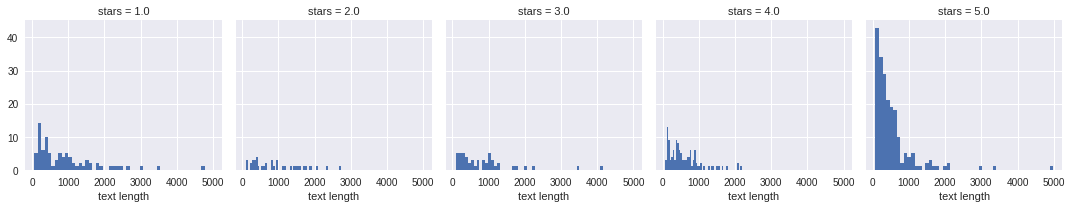

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data=df, col='stars')
g.map(plt.hist, 'text length', bins=50)

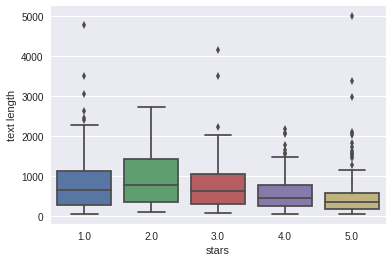

In [114]:
sns.boxplot(x='stars', y='text length', data=df)

In [115]:
stars = df.groupby('stars').mean()
stars.corr()

cool     funny    useful  text length
cool         1.000000  0.588990 -0.012651     0.058141
funny        0.588990  1.000000  0.716581     0.717045
useful      -0.012651  0.716581  1.000000     0.991839
text length  0.058141  0.717045  0.991839     1.000000

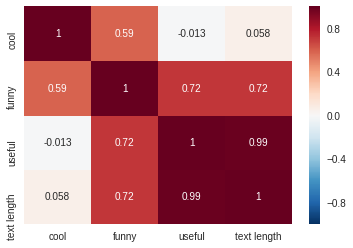

In [116]:
sns.heatmap(data=stars.corr(), annot=True)